In [30]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [8]:
# Generate random 1D data
X = np.random.rand(100, 10, 1)
y = np.random.randint(0, 2, 100)
print(X.shape,y.shape)
#print(X)
#print(y)

(100, 10, 1) (100,)


In [ ]:
itxt="5.txt"
with open(itxt,"r") as f:
    datalist = f.readlines()
datanp=np.zeros((len(datalist),11))
itxt1="7.txt"
with open(itxt1,"r") as f:
    datalist1 = f.readlines()
datanp1=np.zeros((len(datalist1),11))

count=0
for i in datalist:
    datai=i.split("\n")[0].split("\t")
    #print(datai)
    for j in range(11):
        #print(j)
        datanp[count:count+1,j]=float(datai[j])
    count=count+1
print(datanp[0:3,:],datanp.shape)
count1=0
for i in datalist1:
    datai=i.split("\n")[0].split("\t")
    #print(datai)
    for j in range(11):
        #print(j)
        datanp1[count1:count1+1,j]=float(datai[j])
    count1=count1+1
print(datanp1[0:3,:],datanp1.shape)


In [12]:
train_data = datanp
test_data = datanp1
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, dat.shape[0], time_steps)
    Y = dat[Y_ind,:]
    # Prepare X
    rows_x = Y.shape[0]
    X = dat[range(time_steps*rows_x),:]
    X = np.reshape(X, (rows_x, time_steps, 11))    
    return X, Y
time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)
print(trainX.shape,trainY.shape)
print(testX.shape,testY.shape)

(1999, 10, 11) (1999, 11)
(1599, 10, 11) (1599, 11)


In [31]:
# Create model
model = Sequential()
# Add model layers
model.add(Conv1D(100, kernel_size=5, activation='relu', input_shape=(10, 4)))
model.add(Conv1D(100, kernel_size=5, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))
# Compile model
#model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error')
# Fit model
#model.fit(X, y, epochs=5, validation_split=0.2)

In [ ]:
tY=

In [41]:
# Fit model
model.fit(trainX[:,:,1:5], 0.1*trainY[:,5:6]-6.8585, validation_data=(testX[:,:,1:5], 0.1*testY[:,5:6]-6.8585),epochs=50)

Epoch 1/50
63/63 [==============================] - 1s 19ms/step - loss: 8.3958 - val_loss: 1.9002
Epoch 2/50
63/63 [==============================] - 1s 16ms/step - loss: 1.7336 - val_loss: 1.9392
Epoch 3/50
63/63 [==============================] - 1s 15ms/step - loss: 1.7222 - val_loss: 1.9561
Epoch 4/50
63/63 [==============================] - 1s 18ms/step - loss: 1.7211 - val_loss: 1.9666
Epoch 5/50
63/63 [==============================] - 1s 17ms/step - loss: 1.7206 - val_loss: 1.9475
Epoch 6/50
63/63 [==============================] - 1s 12ms/step - loss: 1.7184 - val_loss: 1.9640
Epoch 7/50
63/63 [==============================] - 1s 19ms/step - loss: 1.7183 - val_loss: 1.9480
Epoch 8/50
63/63 [==============================] - 1s 16ms/step - loss: 1.7190 - val_loss: 1.9534
Epoch 9/50
63/63 [==============================] - 1s 12ms/step - loss: 1.7199 - val_loss: 1.9441
Epoch 10/50
63/63 [==============================] - 1s 14ms/step - loss: 1.7163 - val_loss: 1.9533
Epoch 11/

50/50 [==============================] - 1s 7ms/step


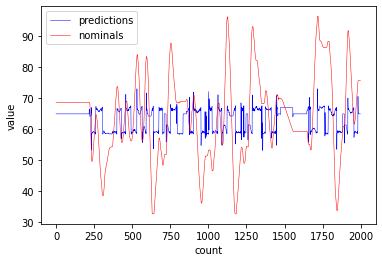

In [42]:
train_predict = model.predict(trainX[:,:,1:5])
test_predict = model.predict(testX[:,:,1:5])
t=range(train_predict.shape[0])
plt.figure()
plt.plot(t,(train_predict+6.8585)*10, color='blue', marker=' ', linestyle='solid',linewidth=0.5, markersize=5,label="predictions")
plt.plot(t,trainY[:,5:6], color='red', marker=' ', linestyle='solid',linewidth=0.5, markersize=5, label="nominals")
plt.legend(loc='best')
plt.xlabel("count")
plt.ylabel("value")
#plt.yscale("log")
pngf="CNN6p911.pdf"
plt.savefig(pngf, dpi=500)